In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
import os
if not os.path.exists("images"):
    os.mkdir("images")

Possible features to examine closer. Defined in 'codebook'.

OUTFUP: Client outcome follow-up after discharge is part of facility’s standard
operating procedures 

SRVC62: Facility offers dedicated mental health treatment program for lesbian, gay,
bisexual, or transgender clients (LGBT) 

MHSUICIDE: Facility offers suicide prevention services



In [2]:
df = pd.read_csv('data/nmhss2018.csv')
df.head()

,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,...,OPRACEPERUNK,OPLEGALTOTVOL,OPLEGALPERVOL,OPLEGALTOTNONFOREN,OPLEGALPERNONFOREN,OPLEGALTOTFOREN,OPLEGALPERFOREN,COD_PCT,TOTADMIS,PERCENTVA
0,201800001,AK,1,1,1,1,0,0,0,0,...,-2,1,-2,0,-2,1,-2,5,2,0
1,201800002,AK,1,1,1,1,1,0,0,0,...,0,0,1,1,7,0,0,5,2,0
2,201800003,AK,1,1,1,1,1,0,0,0,...,1,1,7,0,1,0,0,7,4,1
3,201800004,AK,1,1,1,1,1,0,0,0,...,-2,1,1,0,0,6,7,1,5,1
4,201800005,AK,1,1,1,1,0,0,0,0,...,-2,7,-2,0,-2,0,-2,5,7,3


In [3]:
states = df.groupby("LST").count().sort_values('CASEID', ascending=False)
top_ten_states = states[0:10]
bottom_ten_states = states[-11:-1]

facility_count_average_by_state = df.groupby("LST").count()['CASEID'].mean()

In [4]:
states.head()

,CASEID,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,SETTINGOP,...,OPRACEPERUNK,OPLEGALTOTVOL,OPLEGALPERVOL,OPLEGALTOTNONFOREN,OPLEGALPERNONFOREN,OPLEGALTOTFOREN,OPLEGALPERFOREN,COD_PCT,TOTADMIS,PERCENTVA
LST,,,,,,,,,,,,,,,,,,,,,
CA,851,851,851,851,851,851,851,851,851,851,...,851,851,851,851,851,851,851,851,851,851
NY,845,845,845,845,845,845,845,845,845,845,...,845,845,845,845,845,845,845,845,845,845
OH,563,563,563,563,563,563,563,563,563,563,...,563,563,563,563,563,563,563,563,563,563
PA,561,561,561,561,561,561,561,561,561,561,...,561,561,561,561,561,561,561,561,561,561
FL,482,482,482,482,482,482,482,482,482,482,...,482,482,482,482,482,482,482,482,482,482


Average # of facilities in a state: 220


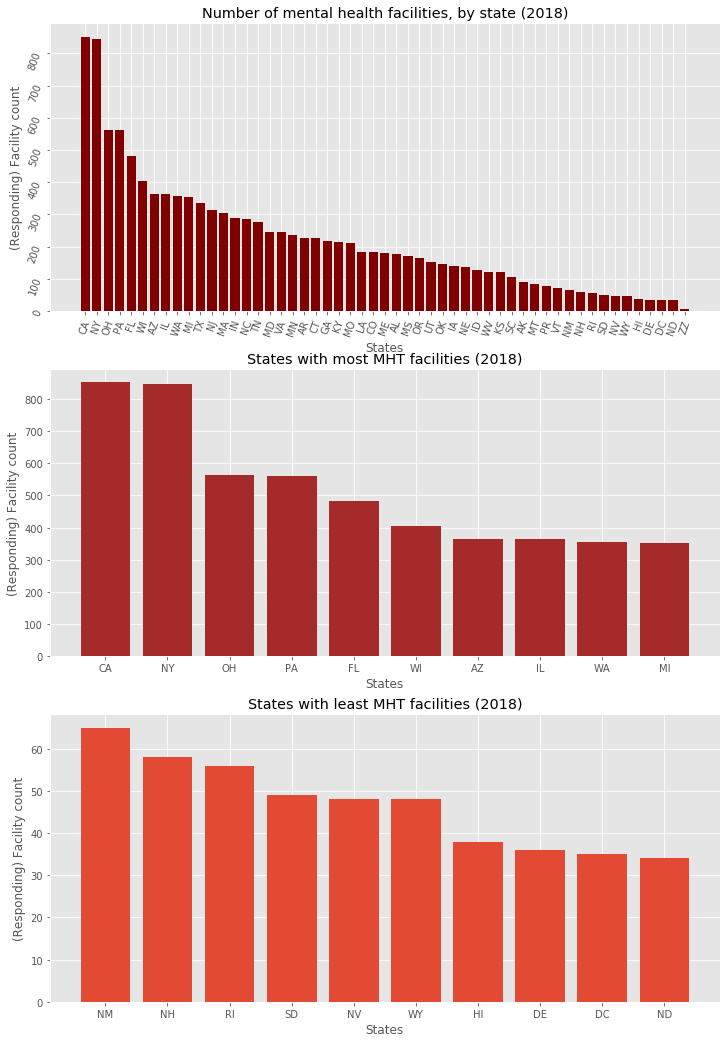

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18))


ax[0].bar(states.index, states['CASEID'], color='maroon')
ax[0].set_title('Number of mental health facilities, by state (2018)')
ax[0].set_xlabel("States")
ax[0].set_ylabel("(Responding) Facility count")
ax[0].tick_params(rotation=70)


ax[1].bar(top_ten_states.index, top_ten_states['CASEID'], color='brown')
ax[1].set_title('States with most MHT facilities (2018)')
ax[1].set_xlabel("States")
ax[1].set_ylabel("(Responding) Facility count")


ax[2].bar(bottom_ten_states.index, bottom_ten_states['CASEID'])
ax[2].set_title('States with least MHT facilities (2018)')
ax[2].set_xlabel("States")
ax[2].set_ylabel("(Responding) Facility count")

plt.tight_layout

print('Average # of facilities in a state:', round(facility_count_average_by_state))

In [6]:
services_total_by_state = df.groupby("LST").agg(sum)
percent_w_service = services_total_by_state/states

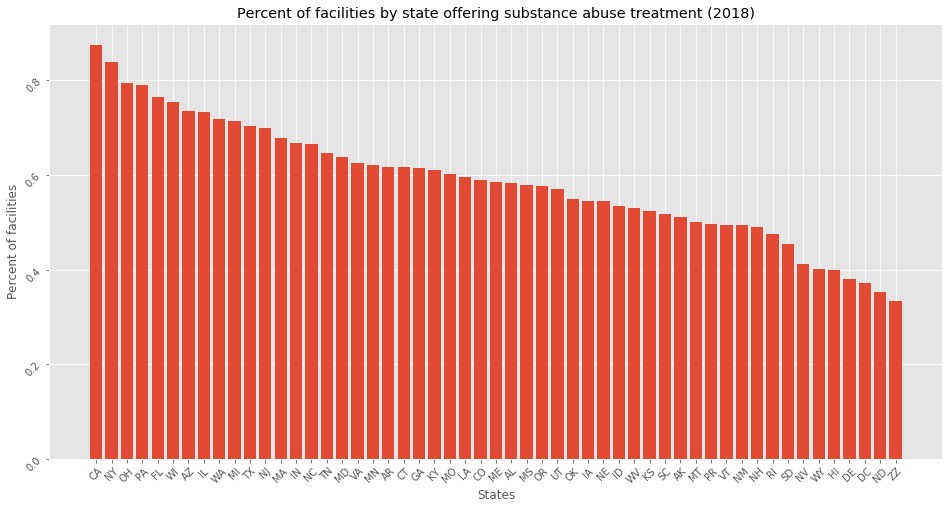

In [7]:
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.bar(states.index, percent_w_service.sort_values('TREATMT', ascending=False)['TREATMT'])
ax.set_title('Percent of facilities by state offering substance abuse treatment (2018)')
ax.set_xlabel("States")
ax.set_ylabel("Percent of facilities")
ax.tick_params(rotation=45)


# print({} facilities per.format)

In [8]:
abb_full = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'PR': 'Puerto Rico Commonwealth',
        'ZZ': 'None'
}    
full_abb = {v:k for k, v in abb_full.items()}

In [9]:
pop = pd.read_csv('data/SCPRC-EST2018-18+POP-RES.csv')
pop['LST'] = pop['NAME'].map(full_abb)

In [10]:
states_pop = states.merge(pop, how='left', on='LST').set_index('LST')
# states_pop.index = states_pop['LST']
#Total state population estimate in column 'POPESTIMATE2018'

In [11]:
fac_pc = states['CASEID']/states_pop['POPESTIMATE2018']
fac_pc = fac_pc.sort_values(ascending=False)
fac_pc.index = fac_pc.index.map(abb_full)
fac_pc.rename(index={"Puerto Rico Commonwealth": "Puerto Rico",
                    "West Virginia": "W. Virginia"}, inplace=True)



In [12]:
top_ten_facpc = fac_pc[:10]
bot_ten_facpc = fac_pc[-11:-1]

In [13]:
top_ten_facpc

LST
Maine          0.000134
Alaska         0.000123
Vermont        0.000117
Wyoming        0.000083
Montana        0.000078
Arkansas       0.000075
Idaho          0.000072
Nebraska       0.000070
Wisconsin      0.000070
W. Virginia    0.000067
dtype: float64

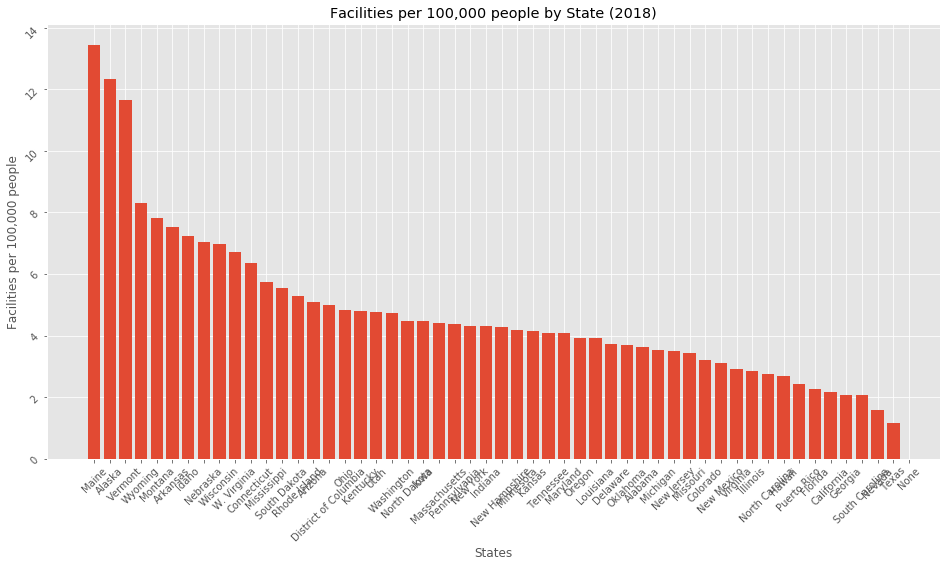

In [14]:

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(fac_pc.index, fac_pc*100000)
ax.set_title('Facilities per 100,000 people by State (2018)')
ax.set_xlabel("States")
ax.set_ylabel("Facilities per 100,000 people")
ax.tick_params(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

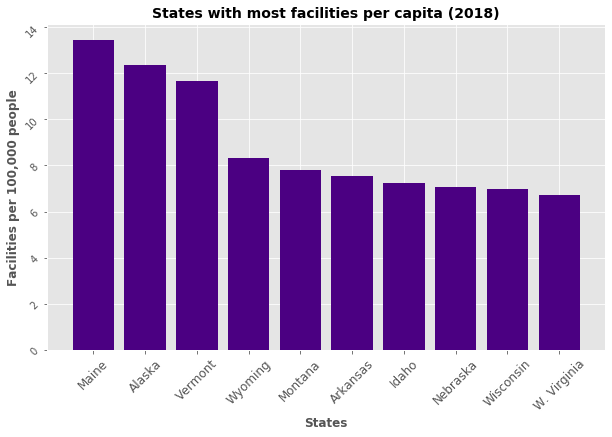

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_ten_facpc.index, top_ten_facpc*100000, color='indigo')
ax.set_title('States with most facilities per capita (2018)', fontsize=14, fontweight='bold')
ax.set_xlabel("States", fontweight='bold')
ax.set_ylabel("Facilities per 100,000 people", fontweight='bold')
ax.tick_params(rotation=45)
plt.xticks(fontsize=12)

In [16]:
# fig.savefig('./images/topten1.jpeg', dpi=300, bbox_inches='tight', optimize=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

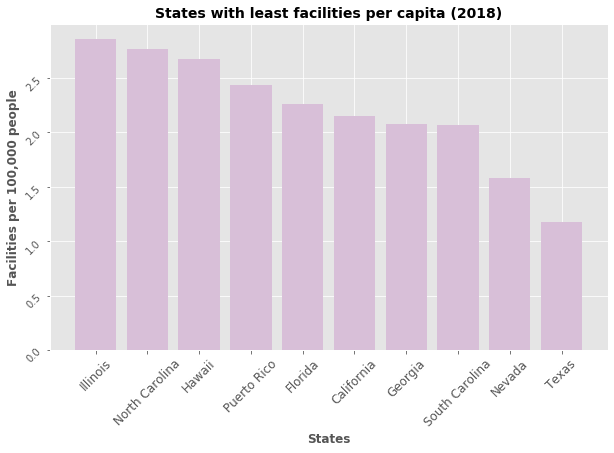

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(bot_ten_facpc.index, bot_ten_facpc*100000, color='thistle')
ax.set_title('States with least facilities per capita (2018)', fontsize=14, fontweight='bold')
ax.set_xlabel("States", fontweight='bold')
ax.set_ylabel("Facilities per 100,000 people", fontweight='bold')
ax.tick_params(rotation=45)
plt.xticks(fontsize=12)

In [18]:
# fig.savefig('./images/bottomten1.jpeg', dpi=300, bbox_inches='tight', optimize=True)

In [19]:
df2010 = pd.read_csv('data/nmhss2010.tsv', sep='\t')
df2012 = pd.read_csv('data/nmhss2012.csv')
df2014 = pd.read_csv('data/nmhss2014.csv')
df2015 = pd.read_csv('data/nmhss2015.csv')
df2016 = pd.read_csv('data/nmhss2016.csv')
df2017 = pd.read_csv('data/nmhss2017.csv')
df2018 = pd.read_csv('data/nmhss2018.csv')

In [20]:
years_arr = np.array([df2010, df2012, df2014, df2015, df2016, df2017, df2018])
for df in years_arr:
    df.columns = map(str.lower, df.columns)

In [21]:
len(df2010)

10374

(0, 15000)

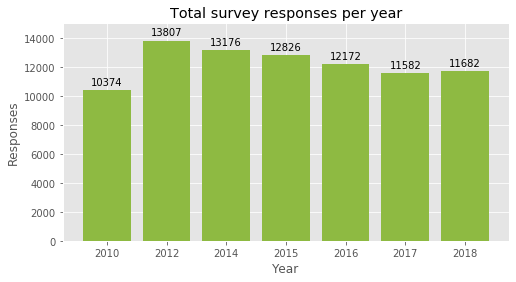

In [22]:
# Overall length
x = ('2010', '2012', '2014', '2015', '2016', '2017','2018')
y = np.array([len(df) for df in years_arr])

fig, ax = plt.subplots(figsize=(8,4))
bar1 = ax.bar(x, y, color='C5')
ax.set_title('Total survey responses per year')
ax.set_ylabel('Responses')
ax.set_xlabel('Year')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)

plt.ylim(0,15000)

In [23]:
fig.savefig('./images/totalresponses.jpeg', dpi=300, bbox_inches='tight', optimize=True)

In [24]:
#Dealing with missing colums
df2010['settingdtph'] = 0

Text(0.5, 0, 'Year')

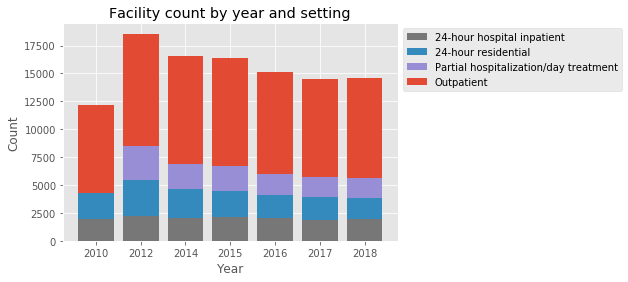

In [25]:
# setting count for each year

x = ('2010', '2012', '2014', '2015', '2016', '2017','2018')
ind = np.arange(7)
settings = ('settingip','settingrc', 'settingdtph', 'settingop')

fig, ax = plt.subplots()

for i in ind:
    totals = [sum(years_arr[i][years_arr[i][setting] == 1][setting]) for setting in settings]
    
    ax.bar(i, totals[0], color='C3', label='settingip')
    ax.bar(i, totals[1], bottom=totals[0], color ='C1', label='settingrc' )
    ax.bar(i, totals[2], bottom=sum(totals[:2]), color='C2', label='settingdtph')
    ax.bar(i, totals[3], bottom=sum(totals[:3]), color='C0', label='settingop')

plt.xticks(ind, x)
plt.title('Facility count by year and setting')
plt.legend(['24-hour hospital inpatient', 
            '24-hour residential', 
            'Partial hospitalization/day treatment', 
            'Outpatient'], 
           bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

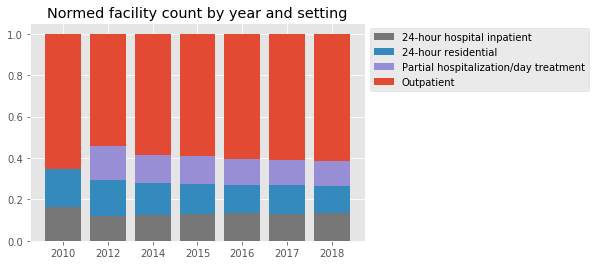

In [26]:
#Setting distribution 

x = ('2010', '2012', '2014', '2015', '2016', '2017','2018')
ind = np.arange(7)
settings = ('settingip','settingrc', 'settingdtph', 'settingop')

fig, ax = plt.subplots()

for i in ind:
    totals = np.array([sum(years_arr[i][years_arr[i][setting] == 1][setting]) for setting in settings])
    t_norm  = totals / sum(totals)
    
    ax.bar(i, t_norm[0], color='C3', label='settingip')
    ax.bar(i, t_norm[1], bottom=t_norm[0], color ='C1', label='settingrc' )
    ax.bar(i, t_norm[2], bottom=sum(t_norm[:2]), color='C2', label='settingdtph')
    ax.bar(i, t_norm[3], bottom=sum(t_norm[:3]), color='C0', label='settingop')

plt.xticks(ind, x)
plt.title('Normed facility count by year and setting')
plt.legend(['24-hour hospital inpatient', 
            '24-hour residential', 
            'Partial hospitalization/day treatment', 
            'Outpatient'], 
           bbox_to_anchor=(1, 1), loc='upper left')

In [27]:
def grab_features(arr, features, ind, normed=False):
    selection = pd.DataFrame(pd.Series(sum(df[df[f] > 0][f]) for f in features) for df in arr)
    if normed:
        if selection.shape[1] > 1:
            selection = selection.apply(lambda x: [elem/sum(x) for elem in x], 
                                        axis=1, 
                                        result_type='expand')
        else:
            scalars = pd.DataFrame([len(df) for df in arr])
            scalars.columns = selection.columns
            scalars.index = selection.index
            selection = selection / scalars
    selection.index = ind
    selection.columns = features
    return selection

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

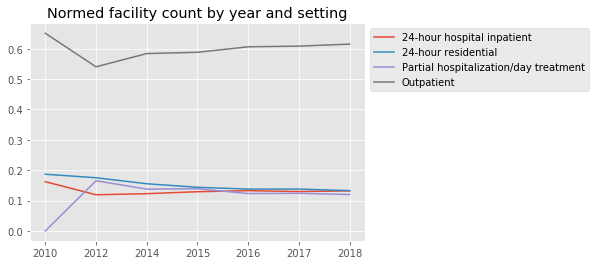

In [28]:
#Normed line graph
x = ('2010', '2012', '2014', '2015', '2016', '2017','2018')
ind = np.arange(7)
settings = ['settingip','settingrc', 'settingdtph', 'settingop']

fig, axs = plt.subplots()

axs.plot(x, grab_features(years_arr, settings, x, normed=True))

plt.title('Normed facility count by year and setting')
plt.legend(['24-hour hospital inpatient', 
            '24-hour residential', 
            'Partial hospitalization/day treatment', 
            'Outpatient'], 
           bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout

In [29]:
# clean past years:
df2010['srvc62'] = df2010['glbt']
years_arr = np.array([df2010, df2012, df2014, df2015, df2016, df2017, df2018])

Text(7, 2, "* 2012 survey contained\n'skips' as an option")

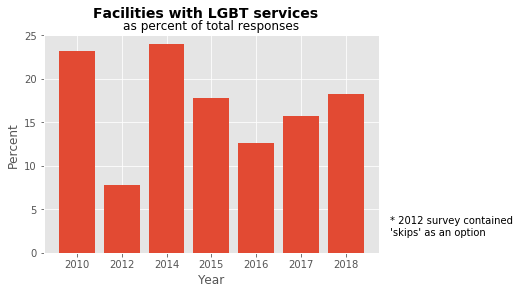

In [30]:
#Normed graph
fig, ax = plt.subplots()

df = grab_features(years_arr, ['srvc62'], x, normed=True)
ax.bar(x, df['srvc62'] * 100)

fig.suptitle('Facilities with LGBT services', fontsize=14, fontweight='bold')
ax.set_title('as percent of total responses', fontsize=12)
plt.ylim(0, 25)
plt.ylabel('Percent')
plt.xlabel('Year')

ax.text(7, 2, "* 2012 survey contained\n'skips' as an option")

Text(7, 2, "* 2012 survey contained\n'skips' as an option")

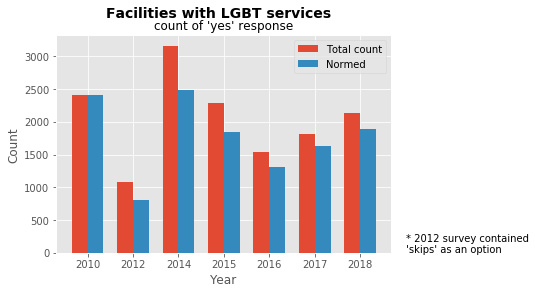

In [31]:
fig, ax = plt.subplots()

df = grab_features(years_arr, ['srvc62'], x, normed=False)

#experiment with normed
df_n = grab_features(years_arr, ['srvc62'], x, normed=True)

ax.bar(x, df['srvc62'], width=-0.35, align='edge', label='Total count')
ax.bar(x, df_n['srvc62']*len(df2010), width=0.35, align='edge', label='Normed')


fig.suptitle('Facilities with LGBT services', fontsize=14, fontweight='bold')
ax.set_title("count of 'yes' response", fontsize=12)
plt.legend()
plt.ylim(0)
plt.ylabel('Count')
plt.xlabel('Year')

ax.text(7, 2, "* 2012 survey contained\n'skips' as an option")

Text(0.5, 0, 'year')

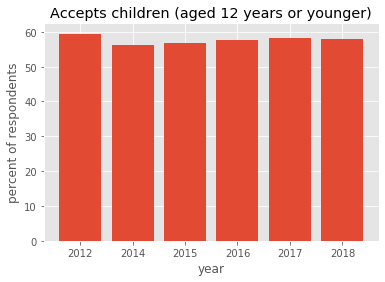

In [32]:
fig, ax = plt.subplots()

df = grab_features(years_arr[1:], ['childad'], x[1:], normed=True)

ax.bar(x[1:], df['childad']*100)
ax.set_title('Accepts children (aged 12 years or younger)')
ax.set_ylabel('percent of respondents')
ax.set_xlabel('year')

Text(0.5, 0, 'year')

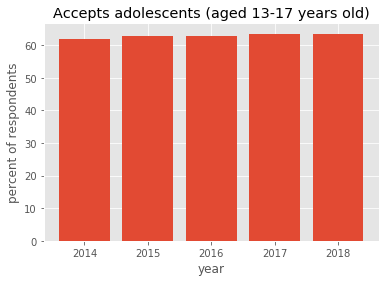

In [33]:
fig, ax = plt.subplots()

df = grab_features(years_arr[2:], ['adoles'], x[2:], normed=True)

ax.bar(x[2:], df['adoles']*100)
ax.set_title('Accepts adolescents (aged 13-17 years old)')
ax.set_ylabel('percent of respondents')
ax.set_xlabel('year')

Text(0.5, 0, 'year')

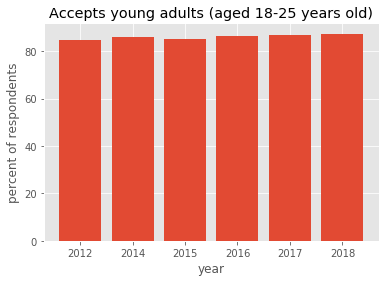

In [34]:
fig, ax = plt.subplots()

df = grab_features(years_arr[1:], ['youngadults'], x[1:], normed=True)

ax.bar(x[1:], df['youngadults']*100)
ax.set_title('Accepts young adults (aged 18-25 years old)')
ax.set_ylabel('percent of respondents')
ax.set_xlabel('year')

Text(0.5, 0, 'year')

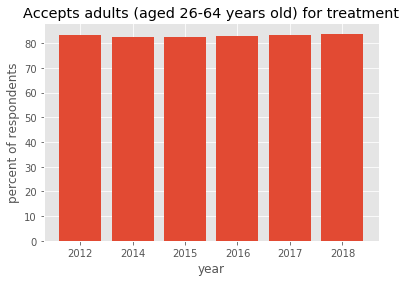

In [35]:
fig, ax = plt.subplots()

df = grab_features(years_arr[1:], ['adult'], x[1:], normed=True)

ax.bar(x[1:], df['adult']*100)
ax.set_title('Accepts adults (aged 26-64 years old) for treatment')
ax.set_ylabel('percent of respondents')
ax.set_xlabel('year')

In [36]:
df2012['seniors'] = df2012['srvc81']

Text(0.5, 0, 'year')

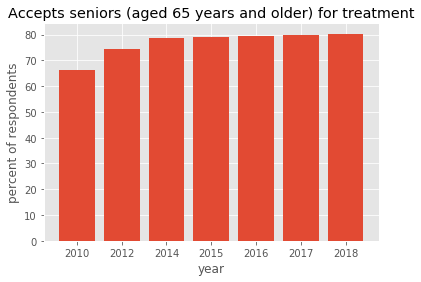

In [37]:
fig, ax = plt.subplots()

df = grab_features(years_arr, ['seniors'], x, normed=True)

ax.bar(x, df['seniors']*100)
ax.set_title('Accepts seniors (aged 65 years and older) for treatment')
ax.set_ylabel('percent of respondents')
ax.set_xlabel('year')

In [38]:
pop.columns = map(str.lower, pop.columns)

In [39]:
def normed_df_with_feature(df, feat, pop):
    """
    For binary valued (0,1) features only.
    Returns dataframe indexed by states.
    Resulting column 'norm_feat' is total 'yes' responses divided by total state facility count 
    Currently set up for use with 2018 population data.
    """
    state_fac_count = df.groupby('lst').count().iloc[:,1].rename('state_fac_c')
    res = df[df[feat] == 1].groupby('lst').agg(sum)
    res = res.merge(pop, how='left', on='lst').set_index('lst') # population column 'popestimate2018'
    res = res.merge(state_fac_count, how='left', on='lst')[[feat, 'state_fac_c', 'popestimate2018']] # join state facility count data
    res['norm_feat'] = res[feat] / res['state_fac_c']
    res['pop_norm_feat'] = res[feat] / res['popestimate2018']
    res['state_abb'] = res.index
    res.index = res.index.map(abb_full)
    res.rename(index={"Puerto Rico Commonwealth": "Puerto Rico",
                        "West Virginia": "W. Virginia"}, inplace=True)
    return res
    

In [256]:
def chart_top_bot_ten(df, feat, pop, title, c1, c2, c3, name):
    y = normed_df_with_feature(df2018, feat, pop).sort_values('norm_feat', ascending=True)
    y_top = y[-10:]
    x_top = y_top.index
    y_bot = y[:10]
    x_bot = y_bot.index
    
    fig, axs = plt.subplots(2, figsize=(12, 14), sharex=True)
    
    
    axs[0].barh(x_top, 100*y_top['norm_feat'], color=c1)
    axs[0].set_title("Top 10", fontsize=16, fontweight='bold')
    axs[0].set_xlabel('Percent', fontsize=14)
    axs[0].tick_params(labelsize=18, rotation=0)
    
    axs[1].barh(x_bot, 100*y_bot['norm_feat'], color=c2)
    axs[1].set_title("Bottom 10", fontsize=16, fontweight='bold')
    axs[1].set_xlabel('Percent')
    axs[1].tick_params(labelsize=18, rotation=0)
    
    plt.tight_layout(h_pad=4)
    plt.show()
    
    fig_usa = go.Figure(data=go.Choropleth(
    locations= y['state_abb'], 
    z = 100*y['norm_feat'].astype(float), 
    locationmode = 'USA-states',
    colorscale = c3,
    colorbar_title = "Percent of facilities in state",
        ))

    fig_usa.update_layout(
        title_text = "<b>{}</b>".format(title),
        font = dict(size=18),
        geo_scope='usa', # limit map scope to USA
        )

    fig_usa.show()
    
    chartname = './images/{}_states.jpeg'.format(name)
    mapname = './images/{}_map.jpeg'.format(name)
    
    fig.savefig(chartname, dpi=300, bbox_inches='tight', optimize=True)
    fig_usa.write_image(mapname, scale=2)
    
    return fig, axs, fig_usa, title

In [41]:
#children
children = 'childad'
ch_title = 'Percent of facilities in state which accepts children for treatment'
ch_c1 = 'chocolate'
ch_c2 = 'goldenrod'
ch_c3 = 'YlOrBr'
ch_name = 'children'

In [42]:
#seniors
seniors = 'srvc63'
sen_title = 'Percent of facilities with program for seniors or older adults'
sen_c1 = 'darkblue'
sen_c2 = 'cornflowerblue'
sen_c3 = 'Blues'
sen_name = 'seniors'

In [43]:
#alzheimers and dementia
alzd = 'alzhdementia'
alz_title = 'Percent of facilities with program for persons with Alzheimer’s or dementia'
alz_c1 = 'indigo'
alz_c2 = 'plum'
alz_c3 = 'Purples'
alz_name = 'alz_d'

In [44]:
#lgbt
lgbt = 'srvc62'
lgbt_title = 'Percent of facilities which provide dedicated LGBT services'
lgbt_c1 = 'seagreen'
lgbt_c2 = 'mediumseagreen'
lgbt_c3 = 'Bugn'
lgbt_name = 'lgbt'

In [45]:
#veterans
vet = 'srvc113'
vet_title = 'Percent of facilities with program for veterans'
vet_c1 = 'darkolivegreen'
vet_c2 = 'yellowgreen'
vet_c3 = 'Greens'
vet_name = 'vet'

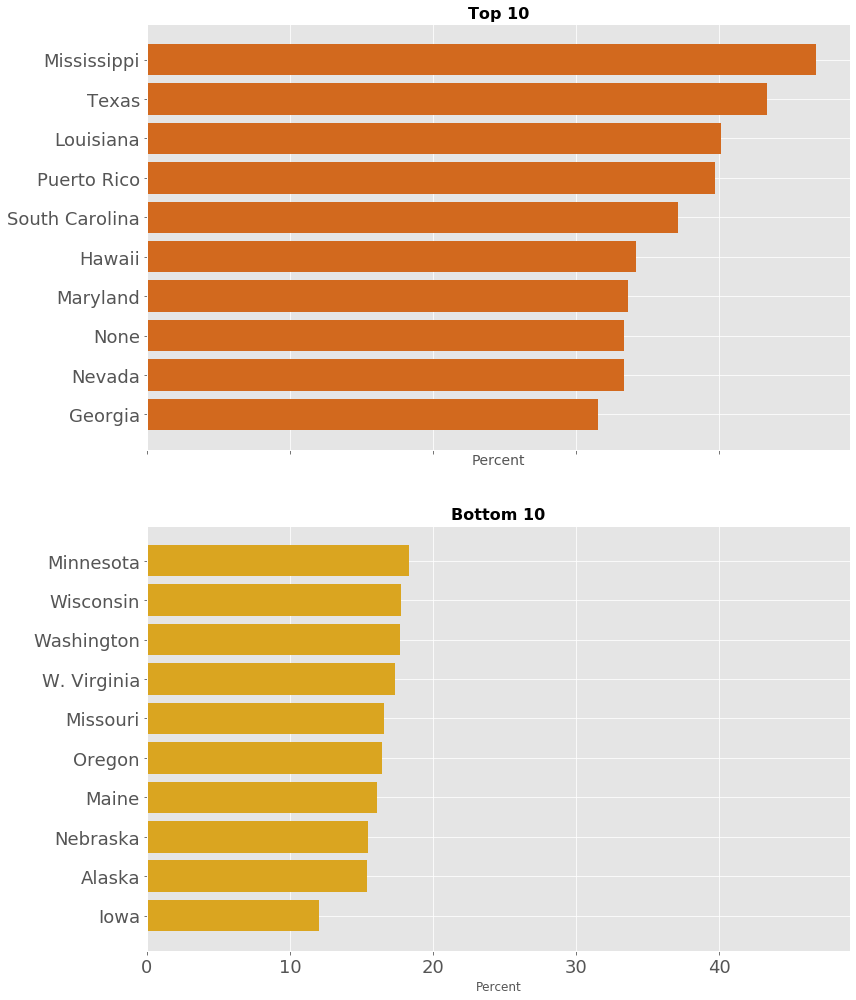

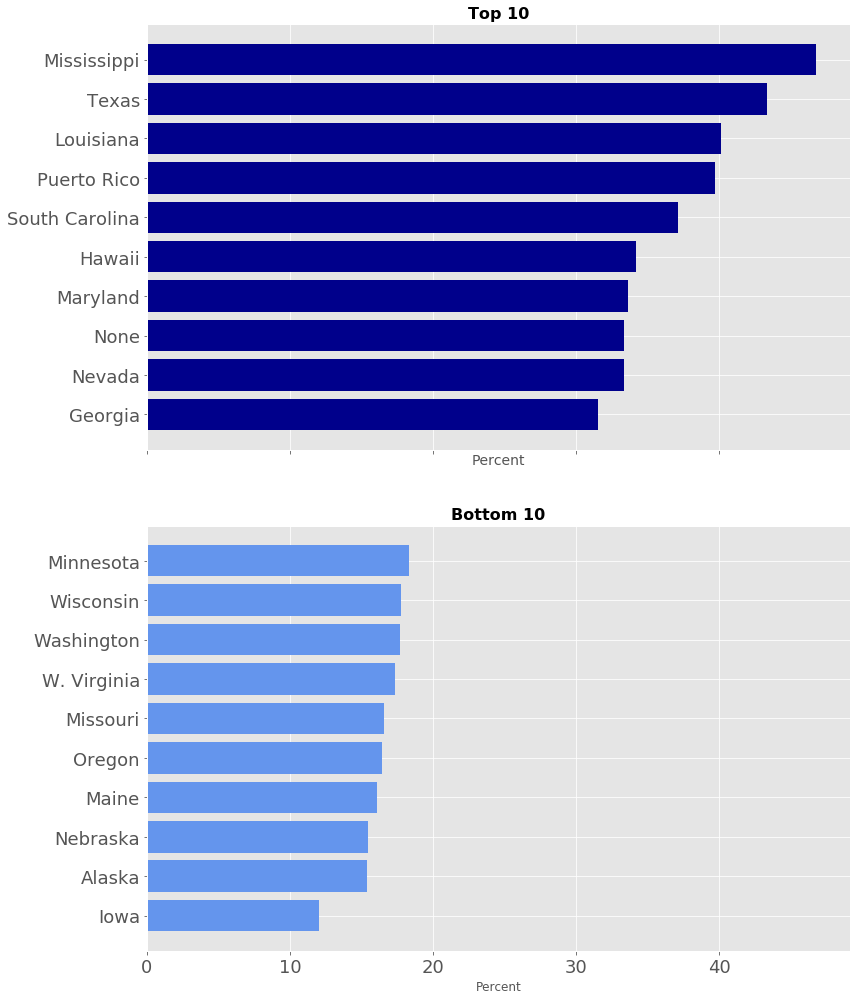

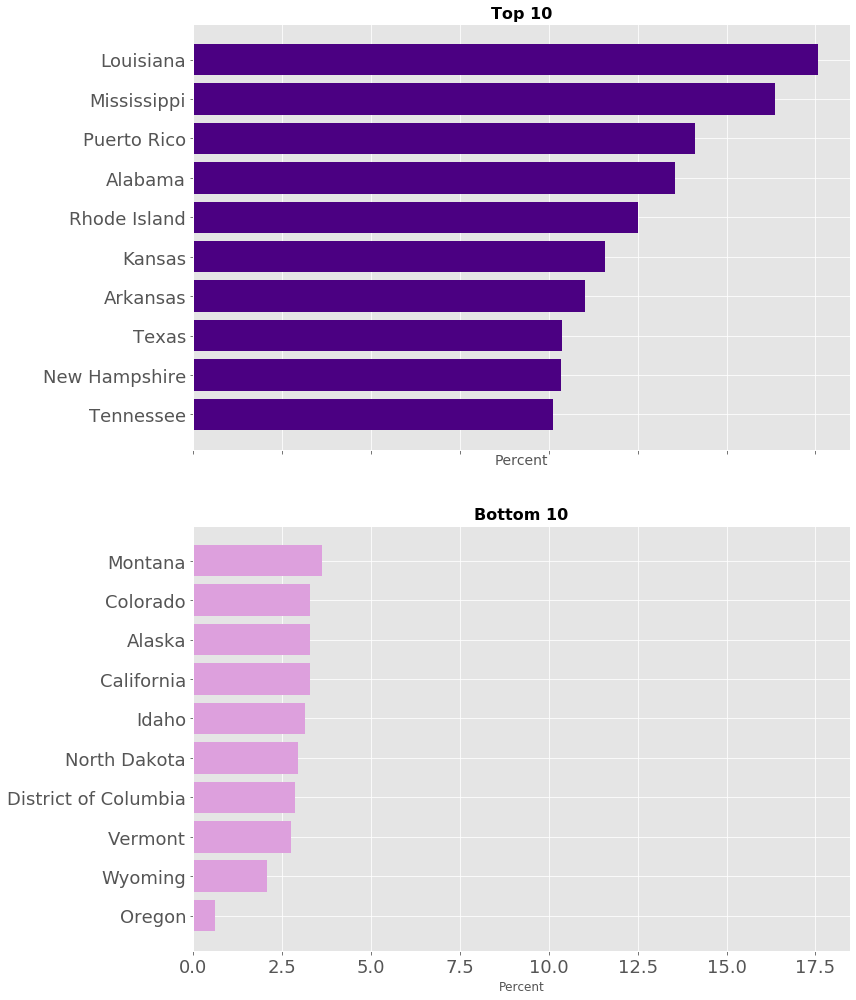

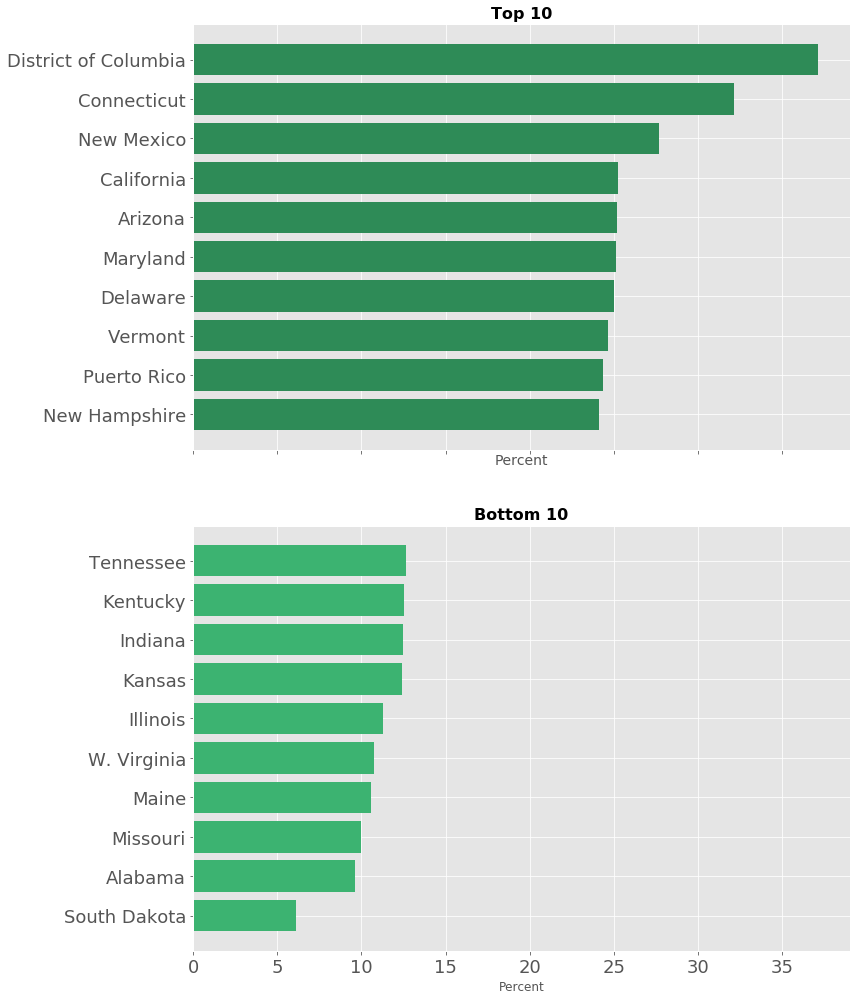

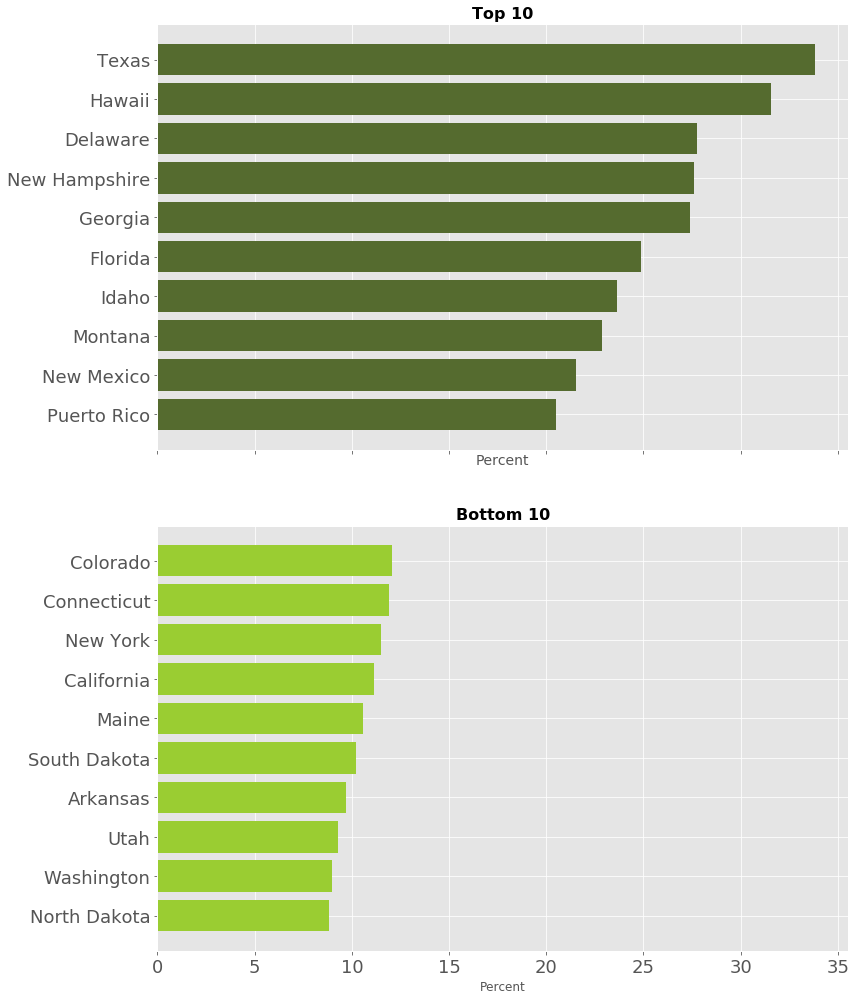

In [257]:
ch_chart = chart_top_bot_ten(df2018, seniors, pop, ch_title, ch_c1, ch_c2, ch_c3, ch_name)
sen_chart = chart_top_bot_ten(df2018, seniors, pop, sen_title, sen_c1, sen_c2, sen_c3, sen_name)
alz_chart = chart_top_bot_ten(df2018, alzd, pop, alz_title, alz_c1, alz_c2, alz_c3, alz_name)
lgbt_chart = chart_top_bot_ten(df2018, lgbt, pop, lgbt_title, lgbt_c1, lgbt_c2, lgbt_c3, lgbt_name)
vet_chart = chart_top_bot_ten(df2018, vet, pop, vet_title, vet_c1, vet_c2, vet_c3, vet_name)

In [47]:
"""
Creating a score for facilities based upon services offered, age-ranges they admit, and total admissions
"""

'\nCreating a score for facilities based upon services offered, age-ranges they admit, and total admissions\n'

In [48]:
def cat_comparison(df, y_feature, x_feature, x_dict=None, p_title=None):

    # Select only valid 'known' responses
    filt = df[(df[x_feature] >= 0) & (df[y_feature] >= 0)]
    
    if not x_dict:
        x_dict = {val:val for val in filt[x_feature].unique()}
    
    fig, ax = plt.subplots(figsize=(18, 8))

    for k in sorted(x_dict.keys()):
        y = filt[filt[x_feature] == k][y_feature].sum()
        
        ax.bar(k, y, label= x_dict[k], color='b')

    plt.xticks(np.arange(len(x_dict)), [v for v in x_dict.values()])
    plt.title(p_title)

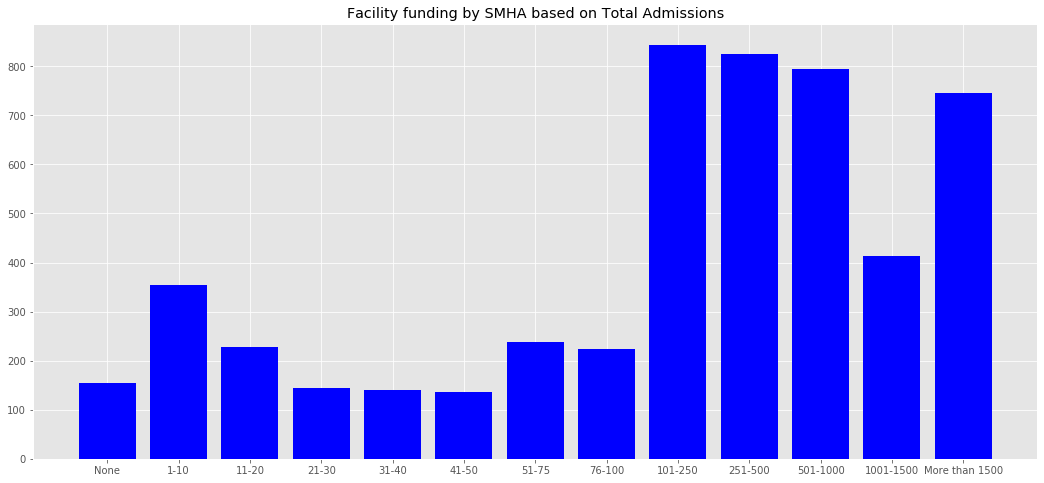

In [49]:
bin_dict = {0:'None', 1:'1-10', 2:'11-20', 3:'21-30', 4:'31-40', 5:'41-50', 6:'51-75', 7:'76-100',
                 8:'101-250', 9:'251-500', 10:'501-1000', 11:'1001-1500', 12:'More than 1500'}

cat_comparison(df2018, 'fundsmha', 'totadmis', bin_dict, p_title='Facility funding by SMHA based on Total Admissions')

In [50]:
"""
Null hypothesis: There is no difference between the mean number of services
for at-risk groups offered at Mental Health treatment facilities in CA and the rest of the country

Alternate hypothesis: There IS a difference
"""

'\nNull hypothesis: There is no difference between the mean number of services\nfor at-risk groups offered at Mental Health treatment facilities in CA and the rest of the country\n\nAlternate hypothesis: There IS a difference\n'

In [51]:
# filtering to just the desired categories answered in question 'A14'.
start_i = df2018.columns.get_loc('sed')
end_i = start_i + 18
s = df2018.iloc[:, start_i: end_i]
serv = pd.concat([s, df2018['lst']], axis=1)

serv = serv.loc[(serv.select_dtypes('number') > 0).any(axis=1)]
serv['services_count'] = serv.select_dtypes('number').apply(sum, axis=1)
serv

,sed,tayoungadults,spmi,srvc63,alzhdementia,srvc31,specgrpeating,posttraum,srvc116,traumaticbrain,srvc113,srvc114,srvc115,srvc62,srvc61,srvc32,srvc35,nospecgrp,lst,services_count
0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,AK,7
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,AK,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,AK,2
4,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,AK,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,ZZ,4
11678,0,0,1,1,0,1,0,1,1,1,1,0,1,0,1,0,0,0,ZZ,9
11679,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ZZ,1
11680,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ZZ,1


In [207]:
# Geographic map of each state's mean service score

states_mean_serv = serv.groupby('lst').agg(np.mean)

fig_usa = go.Figure(data=go.Choropleth(
locations= states_mean_serv.index, 
z = states_mean_serv['services_count'],
locationmode = 'USA-states',
colorscale = 'Reds',
colorbar_title = "State service score",
    ))

fig_usa.update_layout(
    title_text = 'Mean number of services for at-risk groups offered at facilities state-wide ',
    geo_scope='usa', # limit map scope to USA
    )

fig_usa.show()

fig_usa.write_image('./images/mean_score_map.jpeg', scale=2)

Text(0, 0.5, 'Frequency')

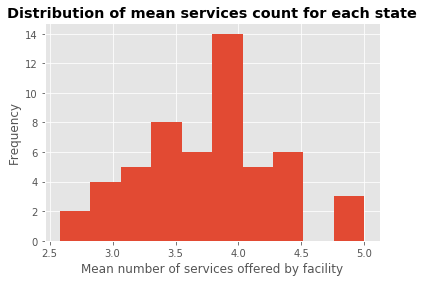

In [192]:
states_mean_serv = serv.groupby('lst').agg(np.mean)
fig, ax = plt.subplots()
ax.hist(states_mean_serv['services_count'])
ax.set_title('Distribution of mean services count for each state', fontweight='bold')
ax.set_xlabel('Mean number of services offered by facility')
ax.set_ylabel('Frequency')

In [203]:
min_state = abb_full[states_mean_serv['services_count'].idxmin()]
min_score = round(states_mean_serv['services_count'].min(), 2)
max_state = abb_full[states_mean_serv['services_count'].idxmax()]
max_score = round(states_mean_serv['services_count'].max(), 2)

print('{} has lowest average score, of {}'.format(min_state, min_score))
print('{} has highest average score, of {}'.format(max_state, max_score))



Iowa has lowest average score, of 2.58
Hawaii has highest average score, of 5.0


Text(0.5, 0, 'Number of services Provided')

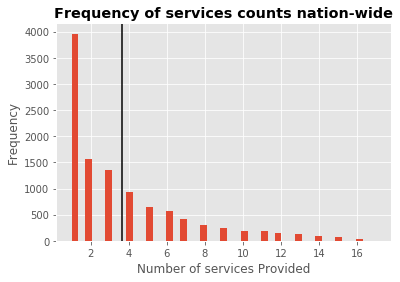

In [53]:
fig, ax = plt.subplots()

ax.hist(serv[serv['lst'] != 'CA']['services_count'], bins=45)
ax.axvline(serv['services_count'].mean(), c='black')

ax.set_title('Frequency of services counts nation-wide', fontweight='bold')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of services Provided')

In [54]:
serv_usa = serv[serv['lst'] != 'CA']
mean_usa = serv_usa['services_count'].mean()
std_usa = serv_usa['services_count'].std()


In [55]:
serv_ca = serv[serv['lst'] == 'CA']
mean_ca = serv_ca['services_count'].mean()
std_ca = serv_ca['services_count'].std()

In [163]:
mean_usa, mean_ca

(3.644750207775418, 3.856470588235294)

In [56]:
stats.ttest_ind(serv_usa['services_count'], serv_ca['services_count'])

Ttest_indResult(statistic=-1.8017840675375332, pvalue=0.07160516795289397)

In [57]:
serv_usa['services_count']

0        7
1        1
2        1
3        2
4        4
        ..
11677    4
11678    9
11679    1
11680    1
11681    1
Name: services_count, Length: 10829, dtype: int64

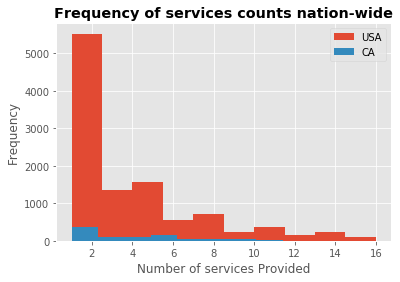

In [141]:
fig, ax = plt.subplots()

x_usa = serv_usa[serv_usa['services_count'] < (mean_usa + 4*std_usa)]['services_count'] #removing outliers
x_ca = serv_ca[serv_ca['services_count'] < (mean_ca + 4*std_ca)]['services_count']

ax.hist(x_usa, label='USA')
ax.hist(x_ca, label='CA')
# ax.axvline(serv['services_count'].mean(), c='black')

ax.set_title('Frequency of services counts nation-wide', fontweight='bold')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of services Provided')

plt.legend()

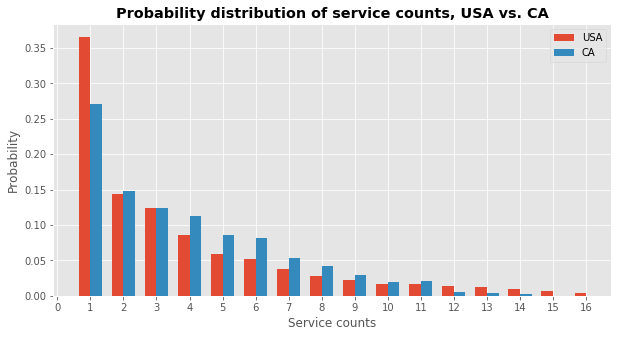

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))

usa_unique, usa_counts = np.unique(x_usa, return_counts=True)
ca_unique, ca_counts = np.unique(x_ca, return_counts=True)

w = 0.35

ax.bar(usa_unique, usa_counts / len(x_usa), label = 'USA', align='edge', width=-w)
ax.bar(ca_unique, ca_counts / len(x_ca), label = 'CA', align='edge', width=w)

ax.set_title('Probability distribution of service counts, USA vs. CA', fontweight='bold')
ax.set_ylabel('Probability')
ax.set_xlabel('Service counts')
ax.set_xticks(np.arange(17))
ax.legend()

In [161]:
fig.savefig('./images/prob_dist1.jpeg', dpi=300, bbox_inches='tight', optimize=True)